<a href="https://colab.research.google.com/github/Ragunath1034/Machine-Learning/blob/main/Loan_default_prediction_model_P2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

# New Section

Loading the cleaned data set form part-1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lending club_preprocessed.csv')

In [ ]:
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,...,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,earliest_cr_year
0,0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999


In [ ]:
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = df.drop(columns=['loan_repaid'], axis=1)
y = df['loan_repaid']

In [ ]:
X.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007


In [ ]:
y.head(3)

0    1
1    1
2    1
Name: loan_repaid, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
minmax = MinMaxScaler()

In [ ]:
minmax.fit(X_train)

MinMaxScaler()

Scaling the features using MinMax

In [ ]:
Xtrain_scaled = minmax.transform(X_train)

In [ ]:
pd.DataFrame(Xtrain_scaled).head(3)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.516232,1.0,0.400857,0.322779,0.004824,0.001854,0.192982,0.0,0.005219,0.044492,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.676923
1,0.236155,0.0,0.414492,0.219961,0.004250,0.001181,0.192982,0.0,0.003943,0.083380,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.800000
2,0.287078,1.0,0.488508,0.188398,0.005283,0.002961,0.157895,0.0,0.003063,0.040009,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.492308


In [ ]:
Xtest_scaled = minmax.transform(X_test)

In [ ]:
print(Xtrain_scaled.shape)
print(Xtest_scaled.shape)

(276653, 78)
(118566, 78)


In [ ]:
type(Xtrain_scaled)

numpy.ndarray

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

Building a dense 4 layer neural network model with loss function as binary-crossentropy & optimizer as adam function

In [ ]:
model = Sequential()

model.add(Dense(units=78, activation='relu'))

model.add(Dense(units=39, activation='relu'))

model.add(Dense(units=19, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Applying early stopping to obtain the best parameters

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Fitting the model to the scaled input parameters and the target 

In [ ]:
model.fit(x=Xtrain_scaled,
          y=y_train,
          epochs=600,
          validation_data=(Xtest_scaled,y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
8646/8646 [==============================] - 33s 4ms/step - loss: 0.2719 - val_loss: 0.2611
Epoch 2/600
8646/8646 [==============================] - 19s 2ms/step - loss: 0.2613 - val_loss: 0.2599
Epoch 3/600
8646/8646 [==============================] - 19s 2ms/step - loss: 0.2603 - val_loss: 0.2598
Epoch 4/600
8646/8646 [==============================] - 21s 2ms/step - loss: 0.2595 - val_loss: 0.2593
Epoch 5/600
8646/8646 [==============================] - 22s 3ms/step - loss: 0.2588 - val_loss: 0.2598
Epoch 6/600
8646/8646 [==============================] - 20s 2ms/step - loss: 0.2583 - val_loss: 0.2599
Epoch 7/600
8646/8646 [==============================] - 19s 2ms/step - loss: 0.2580 - val_loss: 0.2597
Epoch 8/600
8646/8646 [==============================] - 19s 2ms/step - loss: 0.2575 - val_loss: 0.2600
Epoch 9/600
8646/8646 [==============================] - 21s 2ms/step - loss: 0.2570 - val_loss: 0.2595
Epoch 10/600
8646/8646 [==============================] - 19s 2m

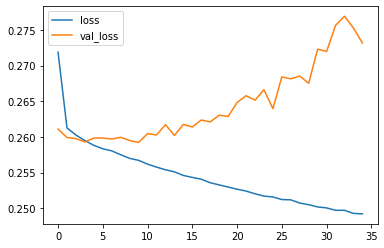

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = model.predict(Xtest_scaled)
classes_x=np.where(predictions > 0.5, 1,0)

Checking the model prediciton

In [ ]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     23210
           1       0.88      0.99      0.93     95356

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566



The recall for one of the classes is lower as the classes are imbalanced in nature. The predictions can be improved by suitable sampling techniques

In [ ]:
print(confusion_matrix(y_test, classes_x))

[[10479 12731]
 [  549 94807]]


In [ ]:
classes_x

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
predictions

array([[0.7369574],
       [0.5395375],
       [0.566862 ],
       ...,
       [1.       ],
       [1.       ],
       [0.7948452]], dtype=float32)